Reading and showing the first few lines of the dataframe

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df_train = pd.read_csv(r'../input/train.csv')
print(df_train.shape)
df_train.head()


(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


As we observe there are 10 features (passengerID is just the number ID and Survived is the lable, where 1: survived and 0: Didn't survive). There are a few features that need more clarification:
1. Pclass: shows ticket class. There are in total 3 classes represented by 1,2, and 3
2. SibSp: # of siblings/spouse that any idividual had on board
3. Parch: # of parents/children that any idividual had on board
4. Embarked: The port each passenger boarded Titanic. There are three letters: C,S, and Q corresponding with three different ports.



Now, let's take a look at test data:

In [2]:
df_test = pd.read_csv(r'../input/test.csv')
print(df_test.shape)
df_test

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Preprocessing

In this part, we will take a look at features with missing values. Depending on the importance of the feature and percentage of missing values, we might impute or remove that feature. 
Also, we will categories some features and convert categorical data to numbers for the classification purpose.


'table_of_missingValue' is a function that creates a dataframe of the number of missing values and percentage of missing values for each feature, along with the total number of samples:


In [3]:
def table_of_missingValue(input_df):   
    missing_values_table = pd.DataFrame()
    total_values = [len(input_df)]*input_df.shape[1]
    missing_values_table['Total_missing_values'] = input_df.isna().sum()
    missing_values_table['Percent_of_missingValues'] = input_df.isna().mean().round(4)
    missing_values_table['Total'] = total_values
    return missing_values_table

Presenting missing values' counts and percentage in each field for the training data:

In [4]:
missing_values_table = table_of_missingValue(df_train)
missing_values_table

,Total_missing_values,Percent_of_missingValues,Total
PassengerId,0,0.0000,891
Survived,0,0.0000,891
Pclass,0,0.0000,891
Name,0,0.0000,891
Sex,0,0.0000,891
Age,177,0.1987,891
SibSp,0,0.0000,891
Parch,0,0.0000,891
Ticket,0,0.0000,891
Fare,0,0.0000,891


Presenting missing values' counts and percentage in each field for the test data:

In [5]:
missing_values_test = table_of_missingValue(df_test)
missing_values_test

,Total_missing_values,Percent_of_missingValues,Total
PassengerId,0,0.0000,418
Pclass,0,0.0000,418
Name,0,0.0000,418
Sex,0,0.0000,418
Age,86,0.2057,418
SibSp,0,0.0000,418
Parch,0,0.0000,418
Ticket,0,0.0000,418
Fare,1,0.0024,418
Cabin,327,0.7823,418


As we observe in the training set, cabin, embarked and age have missing values.
In the test set, Cabin, Age, and fare have missing values. Let's take a closer look at each of these features:

1. Cabin has close to 80% missing values in both training and test set. We decide to remove this feature as imputing it might add too much bias and noise to the model. In addition, other features like Pclass and fare can represent information that are related to cabin.

2. Embarked has only two missing values in the training set. We might be able to impute them using other features.

3. Fare has one missing value in the test set that can be imputed.

4. Age, has a considerable percentage of missing values in both training and test sets (about 20%). It's most likely an important feature. 

Let's do some visualization to observe the importance of age: 

In [6]:
def categorizeAge(x, split=[14,25,35,50,65]): 
    ''' returns categorical value of age based on 5 split values''' 
    if pd.isnull(x):
        return None
    
    if (x>=0)and (x<split[0]):
        return 0
    elif (x>=split[0]) and (x<split[1]):
        return 1
    elif (x>=split[1]) and (x<split[2]):
        return 2
    elif (x>=split[2]) and (x<split[3]):
        return 3
    elif (x>=split[3]) and (x<split[4]):
        return 4
    else:
        return 5

In [7]:
# source: https://github.com/minsuk-heo/kaggle-titanic/blob/master/titanic-solution.ipynb
def bar_chart(df,feature):
    survived = df[df['Survived']==1][feature].value_counts()
    dead = df[df['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

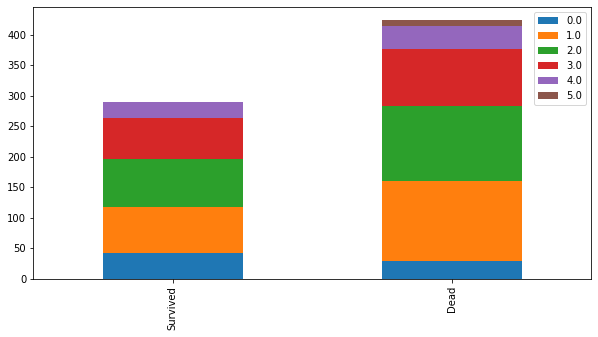

In [8]:
df_train['AgeGroup'] = df_train["Age"].apply(categorizeAge)
bar_chart(df_train,'AgeGroup')
df_train.drop('AgeGroup', axis=1, inplace=True)

The above graph shows younger people (<14) are about twice likely to survive. It also shows people who are 65 or older are quite unlikely to survive. We also observe other age groups have different probability for survival compared with those who did not survive in the same age group.

These observations show that age is an important feature and we should perform imputation to estimate the missing values in both training and test sets. 

We will show the procedure for age imputation later. First, let's do more preprocessing.
There is only one sample in the test set that has a missing Fare. Let's take a look at that sample:

In [9]:
df_test[df_test['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


As we observe, the sample with a missing fare value is from Pclass of 3. We also observe that SibSp and Parch are both zero for this sample. Using this information, we can use the average of Fare values for all the passengers from Pclass of 3 and with Parch and SibSp both equal to zero to impute for the missing fare value in the test set:

In [10]:

df_test.loc[df_test.PassengerId==1044,'Fare'] = \
(df_test[(df_test['SibSp']==0) & (df_test['Parch']==0) & (df_test['Pclass']==3)])['Fare'].mean() 
df_test[df_test.PassengerId==1044]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,8.710233,NaN,S


Next, let's take a look at the rows with the missing values in the 'Embarked' column of the training set:

In [11]:
df_train[df_train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


There are only two samples where Embarked feature is missing, both of which have the same ticket number and occupied the same cabin. Since, there are only samples with this feature being missed, removing the corresponding samples seems reasonable. However, we might as well be able to impute the missing values. We should consider the following facts:

1. Embarked: is the port in which each passenger boarded the ship.

2. Both of the observations with missing Embarked feature are female, have the same Ticket number and have the same Fare.

Let's take a look at the relation between Fare, Embarked, and Sex:

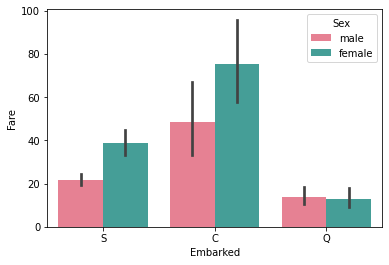

In [12]:
ax = sns.barplot(x="Embarked", y="Fare", hue="Sex", 
                 data=df_train, palette=('husl'))

Based on the Fare value, it seems like the missing 'Embarked' for the above two observations is C. We can replace C for these two observations:

In [13]:
df_train['Embarked'].fillna('C', inplace=True)
print(df_train[df_train.PassengerId==62], df_train[df_train.PassengerId==830])

    PassengerId  Survived  Pclass                 Name     Sex   Age  SibSp  \
61           62         1       1  Icard, Miss. Amelie  female  38.0      0   

    Parch  Ticket  Fare Cabin Embarked  
61      0  113572  80.0   B28        C        PassengerId  Survived  Pclass                                       Name  \
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
829  female  62.0      0      0  113572  80.0   B28        C  


Before getting to age imputation, we can do some further preprocessing:
1. Drop couple of columns
2. Extract title from names and then categorize the extracted titles.
3. Map categorical features (embarked and sex) into numerical groups
4. Combine SibSp and Parch to get a new feature

In [14]:
def categorizeEmbarked(x):
    if (x == "C"):
        return 0
    elif (x == "Q"):
        return 1
    else:
        return 2

In [15]:
def categorizeTitle(x):
    if (x == "Mr"):
        return 0
    elif (x == "Miss"):
        return 1
    elif (x == "Mrs"):
        return 2
    elif (x == "Master"):
        return 3
    else:
        return 4

In [16]:
def categorizeFare(x, split=[14,21,85]): 
    ''' returns categorical value of age based on 5 split values''' 
    if pd.isnull(x):
        return None
    
    if (x>=0)and (x<split[0]):
        return 0
    elif (x>=split[0]) and (x<split[1]):
        return 1
    elif (x>=split[1]) and (x<split[2]):
        return 2
    else:
        return 3

In [17]:
def preprocessing(df):
    df["Sex"] = df["Sex"].apply(lambda x: 0 if x=="female" else 1)  
    df["Embarked"] = df["Embarked"].apply(categorizeEmbarked)
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['TitleGroup'] = df['Title'].apply(categorizeTitle)
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['FareGroup'] = df['Fare'].apply(categorizeFare)  
    df.drop(['Cabin','Ticket','Name','SibSp','Parch','Title','Fare'], axis=1, inplace=True)
    return df


In [18]:
df_train = preprocessing(df_train)
df_test = preprocessing(df_test)

In [19]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,Embarked,TitleGroup,FamilySize,FareGroup
0,1,0,3,1,22.0,2,0,2,0
1,2,1,1,0,38.0,0,2,2,2
2,3,1,3,0,26.0,2,1,1,0
3,4,1,1,0,35.0,2,2,2,2
4,5,0,3,1,35.0,2,0,1,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,2,4,1,0
887,888,1,1,0,19.0,2,1,1,2
888,889,0,3,0,NaN,2,1,4,2
889,890,1,1,1,26.0,0,0,1,2


In [20]:
df_test

,PassengerId,Pclass,Sex,Age,Embarked,TitleGroup,FamilySize,FareGroup
0,892,3,1,34.5,1,0,1,0
1,893,3,0,47.0,2,2,2,0
2,894,2,1,62.0,1,0,1,0
3,895,3,1,27.0,2,0,1,0
4,896,3,0,22.0,2,2,3,0
...,...,...,...,...,...,...,...,...
413,1305,3,1,NaN,2,0,1,0
414,1306,1,0,39.0,0,4,1,3
415,1307,3,1,38.5,2,0,1,0
416,1308,3,1,NaN,2,0,1,0


In [21]:

df = df_train.drop('Survived', axis=1)
# Split train data into sets with known and unknown Age values
knownAge = df.loc[(df.Age.notnull())]
unknownAge = df.loc[(df.Age.isnull())]
y = knownAge['Age']
knownAge = knownAge.drop('PassengerId', axis=1)
X = knownAge.drop('Age', axis=1)

unknownAge = unknownAge.drop(['Age','PassengerId'], axis=1)
print(X.shape, y.shape)

unknownAge_test = df_test.loc[(df_test.Age.isnull())]
unknownAge_test = unknownAge_test.drop(['Age','PassengerId'], axis=1)
print(unknownAge_test.shape)


(714, 6) (714,)
(86, 6)


In [22]:
X

,Pclass,Sex,Embarked,TitleGroup,FamilySize,FareGroup
0,3,1,2,0,2,0
1,1,0,0,2,2,2
2,3,0,2,1,1,0
3,1,0,2,2,2,2
4,3,1,2,0,1,0
...,...,...,...,...,...,...
885,3,0,1,2,6,2
886,2,1,2,4,1,0
887,1,0,2,1,1,2
889,1,1,0,0,1,2


In [23]:
unknownAge

,Pclass,Sex,Embarked,TitleGroup,FamilySize,FareGroup
5,3,1,1,0,1,0
17,2,1,2,0,1,0
19,3,0,0,2,1,0
26,3,1,0,0,1,0
28,3,0,1,1,1,0
...,...,...,...,...,...,...
859,3,1,0,0,1,0
863,3,0,2,1,11,2
868,3,1,2,0,1,0
878,3,1,2,0,1,0


In [24]:
unknownAge_test

,Pclass,Sex,Embarked,TitleGroup,FamilySize,FareGroup
10,3,1,2,0,1,0
22,1,0,2,2,1,2
29,3,1,0,0,3,2
33,3,0,2,2,4,2
36,3,0,2,1,1,0
...,...,...,...,...,...,...
408,3,0,1,1,1,0
410,3,0,1,1,1,0
413,3,1,2,0,1,0
416,3,1,2,0,1,0


We use 5 features for age imputation (Pclass, Sex, Embarked, TitleGroup, and FamilySize). However, some of these features might be irrelevant in prediction of age. We can use sklearn RFECV for selecting and ranking the most relevant features and then use those features for age imputation. 

In [25]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor

# define RFE
rfe = RFECV(estimator=DecisionTreeRegressor())
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected False, Rank: 4.000
Column: 2, Selected False, Rank: 3.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected False, Rank: 2.000
Column: 5, Selected False, Rank: 5.000


Based on the results, Pclass and TitleGroup are the most informative features for imputing the Age feature.
Now, let's see which algorithm wrapped by RFE is more efficient in selecting the most important features:

>lr -10.458 (0.836)
>cart -8.971 (0.688)
>rf -9.154 (0.687)
>gbm -8.952 (0.657)


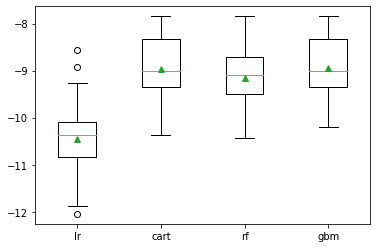

In [27]:
# explore the algorithm wrapped by RFE
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline

num_features = 2

# get a list of models to evaluate
def get_models():
    models = dict()
    # lr
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=num_features)
    model = DecisionTreeRegressor()
    models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
    # cart
    rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=num_features)
    model = DecisionTreeRegressor()
    models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
    # rf
    rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=num_features)
    model = DecisionTreeRegressor()
    models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
    # gbm
    rfe = RFE(estimator=GradientBoostingRegressor(), n_features_to_select=num_features)
    model = DecisionTreeRegressor()
    models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

Gardient boosting works the best for regression of missing age values.

In [28]:
df_test

,PassengerId,Pclass,Sex,Age,Embarked,TitleGroup,FamilySize,FareGroup
0,892,3,1,34.5,1,0,1,0
1,893,3,0,47.0,2,2,2,0
2,894,2,1,62.0,1,0,1,0
3,895,3,1,27.0,2,0,1,0
4,896,3,0,22.0,2,2,3,0
...,...,...,...,...,...,...,...,...
413,1305,3,1,NaN,2,0,1,0
414,1306,1,0,39.0,0,4,1,3
415,1307,3,1,38.5,2,0,1,0
416,1308,3,1,NaN,2,0,1,0


In [29]:

# create pipeline
rfe = RFE(estimator=GradientBoostingRegressor(), n_features_to_select=2)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

pipeline.fit(X,y)

predictedAges = pipeline.predict(unknownAge)
# Assign those predictions to the full data set
df_train.loc[(df_train.Age.isna()), 'Age' ] = predictedAges
df_train["categorizedAge"]=df_train['Age'].apply(categorizeAge)

predictedAges = pipeline.predict(unknownAge_test)

# Assign those predictions to the full data set
df_test.loc[(df_test.Age.isnull()), 'Age' ] = predictedAges

df_test["categorizedAge"]=df_test['Age'].apply(categorizeAge)


In [30]:
print(df_train.shape)
df_train

(891, 10)


,PassengerId,Survived,Pclass,Sex,Age,Embarked,TitleGroup,FamilySize,FareGroup,categorizedAge
0,1,0,3,1,22.000000,2,0,2,0,1
1,2,1,1,0,38.000000,0,2,2,2,3
2,3,1,3,0,26.000000,2,1,1,0,2
3,4,1,1,0,35.000000,2,2,2,2,3
4,5,0,3,1,35.000000,2,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,2,4,1,0,2
887,888,1,1,0,19.000000,2,1,1,2,1
888,889,0,3,0,16.123188,2,1,4,2,1
889,890,1,1,1,26.000000,0,0,1,2,2


In [31]:
print(df_test.shape)
df_test

(418, 9)


,PassengerId,Pclass,Sex,Age,Embarked,TitleGroup,FamilySize,FareGroup,categorizedAge
0,892,3,1,34.500000,1,0,1,0,2
1,893,3,0,47.000000,2,2,2,0,3
2,894,2,1,62.000000,1,0,1,0,4
3,895,3,1,27.000000,2,0,1,0,2
4,896,3,0,22.000000,2,2,3,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,28.724891,2,0,1,0,2
414,1306,1,0,39.000000,0,4,1,3,3
415,1307,3,1,38.500000,2,0,1,0,3
416,1308,3,1,28.724891,2,0,1,0,2


In [32]:
y_train = df_train['Survived']
X_train = df_train.drop(['Age','PassengerId','Survived'], axis=1)
X_test = df_test.drop(['Age','PassengerId'], axis=1)
print(y_train.shape)
print(X_train.shape)
print(X_test.shape)

(891,)
(891, 7)
(418, 7)


Let's explor different classifiers and select the one with highest kfold cross-validation accuracy:

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

 
random_state = 33
models = []
models.append(("RFC", RandomForestClassifier(random_state=random_state)) )
models.append(("ETC", ExtraTreesClassifier(random_state=random_state)) )
models.append(("ADA", AdaBoostClassifier(random_state=random_state)) )
models.append(("GBC", GradientBoostingClassifier(random_state=random_state)) )
models.append(("SVC", SVC(random_state=random_state)) )
models.append(("LoR", LogisticRegression(random_state=random_state)) )
models.append(("LDA", LinearDiscriminantAnalysis()) )
models.append(("QDA", QuadraticDiscriminantAnalysis()) )
models.append(("DTC", DecisionTreeClassifier(random_state=random_state)) )
models.append(("XGB", XGBClassifier()))

kfold = model_selection.KFold(n_splits=10)
 
for name, model in models:
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')  
    print("\n[%s] Mean: %.8f Std. Dev.: %8f" %(name, scores.mean(), scores.std()))



[RFC] Mean: 0.80287557 Std. Dev.: 0.039481

[ETC] Mean: 0.80061590 Std. Dev.: 0.036030

[ADA] Mean: 0.81817728 Std. Dev.: 0.039686

[GBC] Mean: 0.80957553 Std. Dev.: 0.035097

[SVC] Mean: 0.82865585 Std. Dev.: 0.034408

[LoR] Mean: 0.81555972 Std. Dev.: 0.043486

[LDA] Mean: 0.80582189 Std. Dev.: 0.044144

[QDA] Mean: 0.81143987 Std. Dev.: 0.043150

[DTC] Mean: 0.78826883 Std. Dev.: 0.043819

[XGB] Mean: 0.80959634 Std. Dev.: 0.037931


Finally, let's perform perdiction on the test data:

In [35]:
clf = SVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
df_test['Survived'] = prediction
df_test

,PassengerId,Pclass,Sex,Age,Embarked,TitleGroup,FamilySize,FareGroup,categorizedAge,Survived
0,892,3,1,34.500000,1,0,1,0,2,0
1,893,3,0,47.000000,2,2,2,0,3,1
2,894,2,1,62.000000,1,0,1,0,4,0
3,895,3,1,27.000000,2,0,1,0,2,0
4,896,3,0,22.000000,2,2,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,28.724891,2,0,1,0,2,0
414,1306,1,0,39.000000,0,4,1,3,3,1
415,1307,3,1,38.500000,2,0,1,0,3,0
416,1308,3,1,28.724891,2,0,1,0,2,0


# References:
https://www.kaggle.com/chapagain/titanic-solution-a-beginner-s-guide?scriptVersionId=1473689

https://github.com/minsuk-heo/kaggle-titanic/blob/master/titanic-solution.ipynb
https://www.codeastar.com/data-wrangling/

https://machinelearningmastery.com/rfe-feature-selection-in-python/
